In [ ]:
from google.colab import drive, auth
from google.auth import default
import gspread as gd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
drive.mount('/content/drive')
auth.authenticate_user()

creds,_ = default()
gc = gd.authorize(creds)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
x = gc.open('data-set produksi').worksheet('data').col_values(10)
y = gc.open('data-set produksi').worksheet('data').col_values(11)
x1 = np.array([int(x) for x in x])
y1 = np.array([int(x) for x in y])

In [ ]:
# Data contoh waktu produksi berdasarkan jumlah unit yang diproduksi
data = {
  'jumlah_unit': x1,
   'waktu_produksi': y1
}

df = pd.DataFrame(data)
print(df)

    jumlah_unit  waktu_produksi
0            10               1
1            12               5
2            14               9
3            15               3
4            17               5
5            18               7
6            19               1
7            20               7
8            22               3
9            23               4
10           25               2
11           25               8
12           27               8
13           28               6
14           29               4
15           30              10
16           31               3
17           32               6
18           33               7
19           34               2
20           35               7
21           36               5
22           37               3
23           38               9
24           39               2
25           40               5
26           41               6
27           42               1
28           43              10
29           44               4
30      

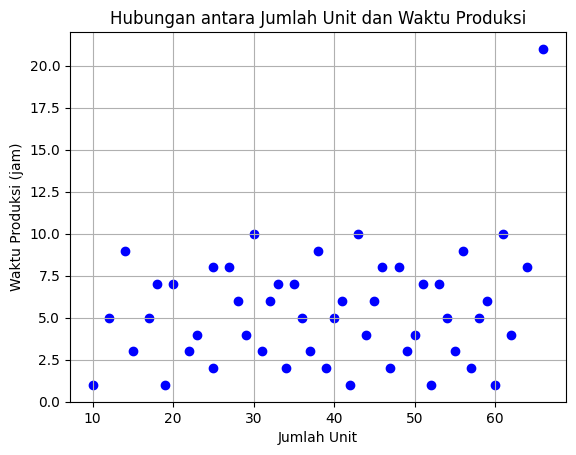

In [ ]:
# Plot hubungan antara jumlah unit dan waktu produksi
plt.scatter(df['jumlah_unit'], df['waktu_produksi'], color='blue')
plt.xlabel('Jumlah Unit')
plt.ylabel('Waktu Produksi (jam)')
plt.title('Hubungan antara Jumlah Unit dan Waktu Produksi')
plt.grid(True)
plt.show()

In [ ]:
# Pisahkan fitur dan target
X = df[['jumlah_unit']]
y = df['waktu_produksi']

# Bagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Buat model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi data training dan testing
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [ ]:
# Prediksi data testing
y_pred = model.predict(X_test)

# Menghitung koefisien determinasi (R^2)
r2_val = r2_score(y_test, y_pred)

# Konversi R^2 ke persen
r2_val_percent = r2_val * 100

# Hitung MSE, MAE, R^2, dan MAPE
mse = mean_squared_error(y_test, y_pred)
mape = 100 - r2_val_percent

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

# Menghitung koefisien determinasi (R^2) untuk data latih
r2_train = model.score(X_train, y_train)

# Output hasil
print(f'Validation Accuracy:: {r2_val_percent:.2f}%')


Mean Squared Error (MSE): 11.42
Mean Absolute Percentage Error (MAPE): 96.02%
Validation Accuracy:: 3.98%


In [ ]:
hasil_prediksi_train = pd.DataFrame({
    'Jumlah Unit': X_train['jumlah_unit'].values,
    'Waktu Produksi Aktual': y_train.values,
    'Waktu Produksi Prediksi': y_pred_train
})

# Tampilkan tabel hasil prediksi untuk data training
print("Hasil Prediksi untuk Data Training:")
print(hasil_prediksi_train)

Hasil Prediksi untuk Data Training:
    Jumlah Unit  Waktu Produksi Aktual  Waktu Produksi Prediksi
0            25                      8                 4.813803
1            14                      9                 4.345695
2            54                      5                 6.047907
3            19                      1                 4.558472
4            18                      7                 4.515916
5            17                      5                 4.473361
6            58                      5                 6.218128
7            59                      6                 6.260683
8            64                      8                 6.473460
9            32                      6                 5.111690
10           25                      2                 4.813803
11           29                      4                 4.984025
12           37                      3                 5.324467
13           47                      2                 5.750020
14  

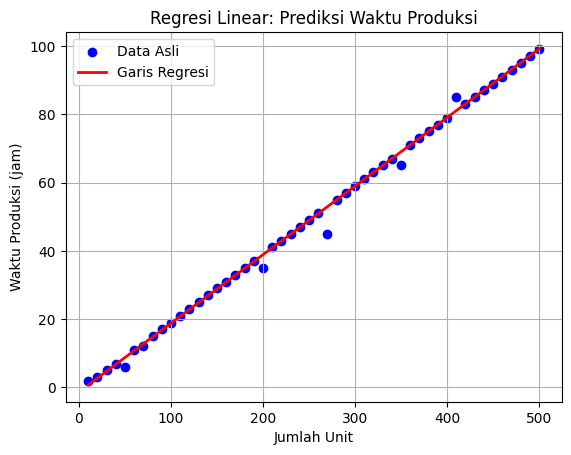

In [ ]:
# Visualisasi hasil regresi linear
plt.scatter(X, y, color='blue', label='Data Asli')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Garis Regresi')
plt.xlabel('Jumlah Unit')
plt.ylabel('Waktu Produksi (jam)')
plt.title('Regresi Linear: Prediksi Waktu Produksi')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Prediksi Waktu Produksi Baru
# Input pengguna
input_jumlah_unit = float(input("Masukkan jumlah unit yang diproduksi: "))

# Bentuk data baru dengan nama fitur yang sesuai
data_baru = pd.DataFrame({'jumlah_unit': [input_jumlah_unit]})

# Prediksi waktu produksi baru
prediksi_waktu = model.predict(data_baru)
print(f"Prediksi waktu produksi untuk {input_jumlah_unit} unit adalah: {prediksi_waktu[0]:.2f} jam")

Masukkan jumlah unit yang diproduksi: 900
Prediksi waktu produksi untuk 900.0 unit adalah: 90.00 jam
